In [26]:
!pip install scikit-learn==1.2.2
#!pip install scikit-learn==1.5.2
#!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.manifold import TSNE
import random

[0 1 2 3 4 5 6 7 8 9]


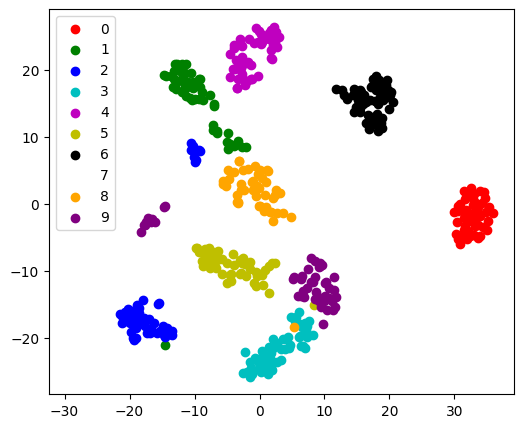

In [12]:
def plot_tsne(X, y, target_names):
    tsne = TSNE(n_components=2, random_state=0)
    X_2d = tsne.fit_transform(X)
    target_ids = range(len(target_names))

    plt.figure(figsize=(6, 5))
    colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
    plt.legend()
    plt.show()


#visualize digits dataset with TSNE
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]
target_names = digits.target_names
print(target_names)
plot_tsne(X, y, target_names)

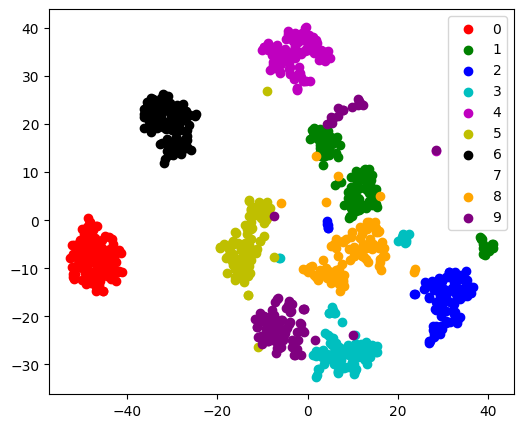

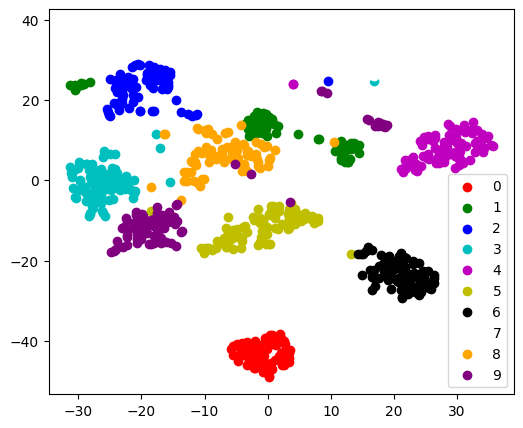

Accuracy of GNB before DR (%): 84.8180677540778


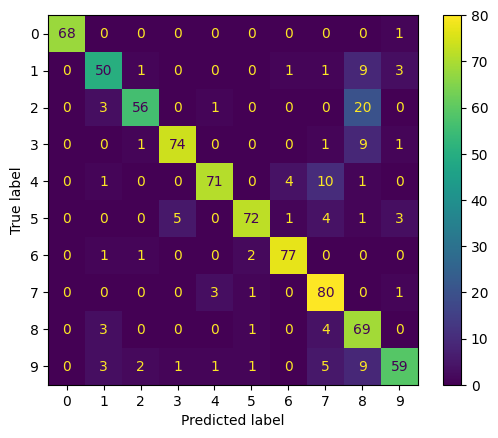

In [13]:
#load digits dataset, and split the dataset into a training set and a testing set
from sklearn.utils import shuffle

digits = datasets.load_digits()
X = digits.data
y = digits.target
X, y = shuffle(X, y)
target_names = digits.target_names

X_train, X_test, y_train, y_test = X[0:1000], X[1000:], y[0:1000], y[1000:]
plot_tsne(X_train, y_train, target_names)
plot_tsne(X_test, y_test, target_names)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy of GNB before DR (%):", acc)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Shape of X: (1000, 64)
Shape of X after PCA: (1000, 10)
Variance Ratio: [0.14890594 0.13618771 0.11794594 0.08409979 0.05782414 0.04916905
 0.04315985 0.03661349 0.03353209 0.030786  ]
Accuracy of GNB after PCA (%): 92.22082810539524


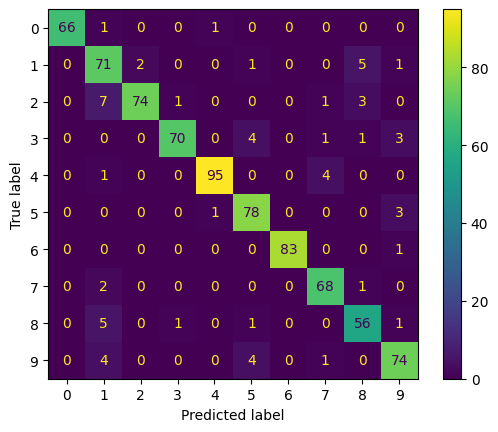

In [30]:
pca = PCA(n_components=10)  #EXPERIMENT HERE
X_pca = pca.fit_transform(X)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = X_pca[0:1000], X_pca[1000:], y[0:1000], y[1000:]

nb = GaussianNB()
nb.fit(X_train_pca, y_train)
y_predict_pca = nb.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_predict_pca)

print('Shape of X:', X_train.shape)
print('Shape of X after PCA:', X_train_pca.shape)
print('Variance Ratio:', pca.explained_variance_ratio_)
print("Accuracy of GNB after PCA (%):", acc_pca * 100)
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_pca)

Shape of X: (1000, 64)
Shape of X after PCA: (1000, 5)
Variance Ratio: [0.14890594 0.13618771 0.11794594 0.08409979 0.05782415]
Accuracy of GNB after PCA (%): 86.3237139272271


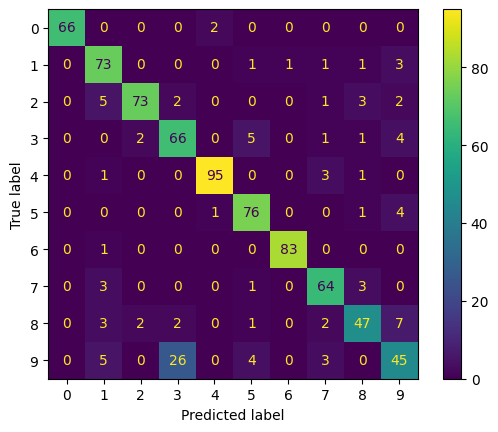

In [31]:
pca = PCA(n_components=5)  #EXPERIMENT HERE
X_pca = pca.fit_transform(X)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = X_pca[0:1000], X_pca[1000:], y[0:1000], y[1000:]

nb = GaussianNB()
nb.fit(X_train_pca, y_train)
y_predict_pca = nb.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_predict_pca)

print('Shape of X:', X_train.shape)
print('Shape of X after PCA:', X_train_pca.shape)
print('Variance Ratio:', pca.explained_variance_ratio_)
print("Accuracy of GNB after PCA (%):", acc_pca * 100)
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_pca)

Maximum accuracy: 0.9535759096612296
Best number of n_components: 48


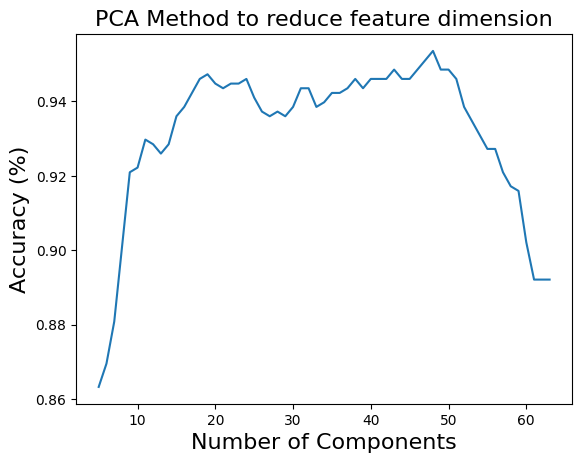

In [32]:
acc_dict = {}
for n_comp in range(5, 64):
    nb = GaussianNB()
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = X_pca[0:1000], X_pca[1000:], y[0:1000], y[1000:]
    nb.fit(X_train_pca, y_train)
    y_predict_pca = nb.predict(X_test_pca)
    acc_pca = accuracy_score(y_test, y_predict_pca)
    acc_dict[n_comp] = acc_pca

plt.plot(*zip(*sorted(acc_dict.items())))
Title = "PCA Method to reduce feature dimension"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Components", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)

print("Maximum accuracy:", max(acc_dict.values()))
print("Best number of n_components:", max(acc_dict, key=acc_dict.get))

# **Feature Selection**

---


In [33]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.feature_selection import SequentialFeatureSelector

Filter Methods

---


In [34]:
def select_feature(X_train, y_train, X_test, y_test, FSM, model):
    fs = FSM
    fs.fit(X_train, y_train)
    X_train_new = fs.transform(X_train)
    X_test_new = fs.transform(X_test)
    model.fit(X_train_new, y_train)
    y_pred = model.predict(X_test_new)
    acc = accuracy_score(y_test, y_pred) * 100

    return acc

In [35]:
from sklearn.utils import shuffle

digits = datasets.load_digits()
X = digits.data
y = digits.target
X, y = shuffle(X, y)
target_names = digits.target_names
X_train, X_test, y_train, y_test = X[0:1000], X[1000:], y[0:1000], y[1000:]

Accuracy of GNB before FS (%): 84.44165621079046


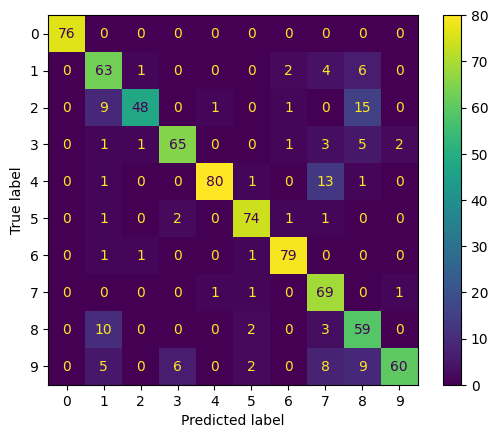

In [36]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy of GNB before FS (%):", acc)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Maximum accuracy: 87.8293601003764
Best number of features: 46


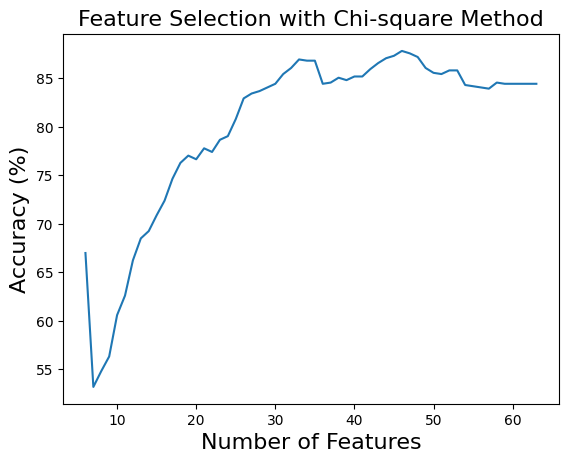

In [37]:
model = GaussianNB()
acc_dict = {}
for nf in range(6, 64):
    fsm = SelectKBest(chi2, k=nf)
    acc = select_feature(X_train, y_train, X_test, y_test, fsm, model)
    acc_dict[nf] = acc

plt.plot(*zip(*sorted(acc_dict.items())))
Title = "Feature Selection with Chi-square Method"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)

print("Maximum accuracy:", max(acc_dict.values()))
print("Best number of features:", max(acc_dict, key=acc_dict.get))

Maximum accuracy: 88.08030112923463
Best number of features: 42


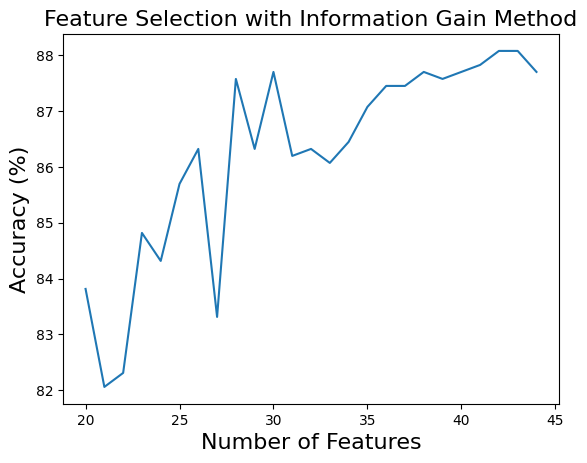

In [38]:
model = GaussianNB()
acc_dict = {}
for nf in range(20, 45):
    fsm = SelectKBest(mutual_info_classif, k=nf)
    acc = select_feature(X_train, y_train, X_test, y_test, fsm, model)
    acc_dict[nf] = acc

plt.plot(*zip(*sorted(acc_dict.items())))
Title = "Feature Selection with Information Gain Method"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)

print("Maximum accuracy:", max(acc_dict.values()))
print("Best number of features:", max(acc_dict, key=acc_dict.get))

In [39]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

Maximum accuracy: 88.45671267252196
Best number of features: 31


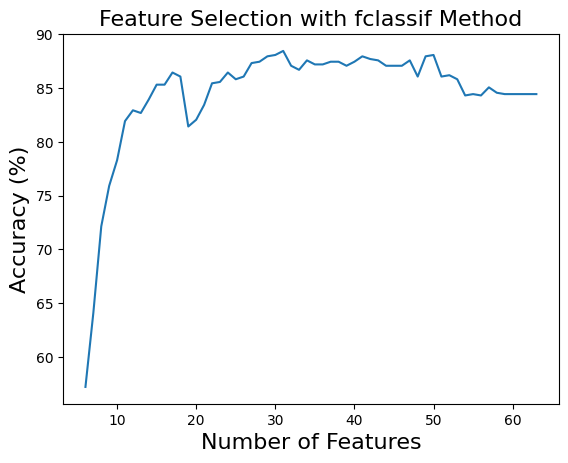

In [40]:
model = GaussianNB()
acc_dict = {}
for nf in range(6, 64):
    fsm = SelectKBest(f_classif, k=nf)  # SelectKBest(chi2, k=nf)
    acc = select_feature(X_train, y_train, X_test, y_test, fsm, model)
    acc_dict[nf] = acc

plt.plot(*zip(*sorted(acc_dict.items())))
Title = "Feature Selection with fclassif Method"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)

print("Maximum accuracy:", max(acc_dict.values()))
print("Best number of features:", max(acc_dict, key=acc_dict.get))

Accuracy of GNB after FS (%): 86.95106649937264


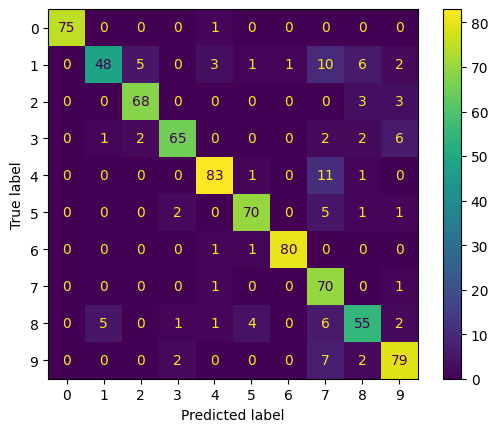

In [41]:
fs = SelectKBest(chi2, k=33)
fs.fit(X_train, y_train)
X_train_new = fs.transform(X_train)
X_test_new = fs.transform(X_test)

nb = GaussianNB()
nb.fit(X_train_new, y_train)
y_pred = nb.predict(X_test_new)

acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy of GNB after FS (%):", acc)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [42]:
from torch.nn.modules.activation import ReLU
import torch


class AutoEncoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(100, 200),
            torch.nn.BatchNorm1d(200),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(200, 90),
            torch.nn.BatchNorm1d(90),
            torch.nn.LeakyReLU(),
        )
        # Building an linear decoder with Linear
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(90, 200),
            torch.nn.BatchNorm1d(200),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(200, 100),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return decoded


In [43]:
# Model Initialization
# Model Initialization with GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoEncoder().to(device)
# model = AutoEncoder().cuda()
# Validation using MSE Loss function
mse = torch.nn.MSELoss()
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(), lr=1e-1, weight_decay=1e-8)

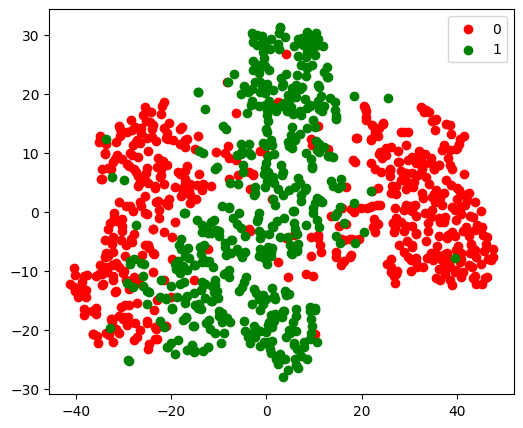

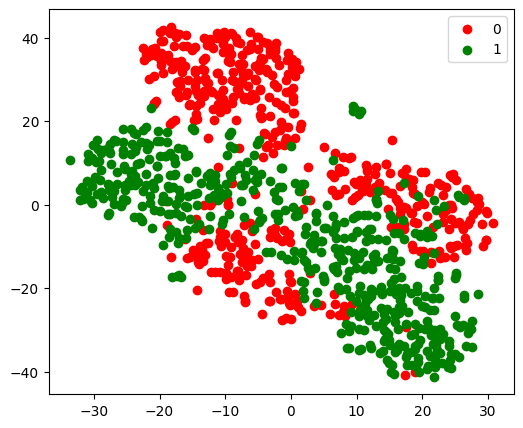

In [44]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

X, y = make_classification(n_samples=2000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = X[0:1000], X[1000:], y[0:1000], y[1000:]
plot_tsne(X_train, y_train, [0, 1])
plot_tsne(X_test, y_test, [0, 1])

t = MinMaxScaler()
X_train = t.fit_transform(X_train)
#X_train = t.transform(X_train)
X_test = t.fit_transform(X_test)

X_train_tensor = torch.Tensor(X_train)  # transform to torch tensor
y_train_tensor = torch.Tensor(y_train)

digit_dataset = TensorDataset(X_train_tensor, y_train_tensor)  # create your datset
digit_loader = DataLoader(digit_dataset, batch_size=16)  # create your dataloader

100%|██████████| 50/50 [00:11<00:00,  4.46it/s]


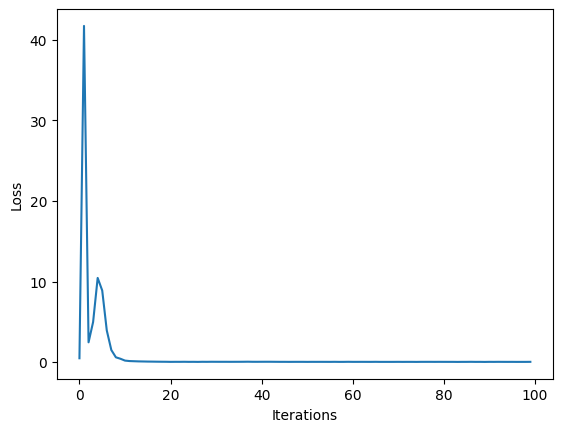

In [45]:
# Check for GPU and use CPU if not available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

epochs = 50
outputs = []
losses = []

for epoch in tqdm(range(epochs)):
    for (image, _) in digit_loader:
        # Move image to the same device as the model (either CPU or GPU)
        image = image.to(device)

        # Output of Autoencoder
        reconstructed = model(image)

        # Calculating the loss function
        loss = mse(reconstructed, image)

        # Zero the gradients, backpropagate, and update the parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses.append(loss.item())

    outputs.append((epoch, image, reconstructed))

# Plotting the losses
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(losses[:100])


To adapt the code for environments without a GPU, such as Colab without CUDA, you should remove .cuda() and adjust it to move the tensors to the appropriate device (CPU or GPU).

Accuracy of LogisticRegression before AutoEncoder (%): 88.8
Accuracy of LogisticRegression after AutoEncoder (%): 90.0


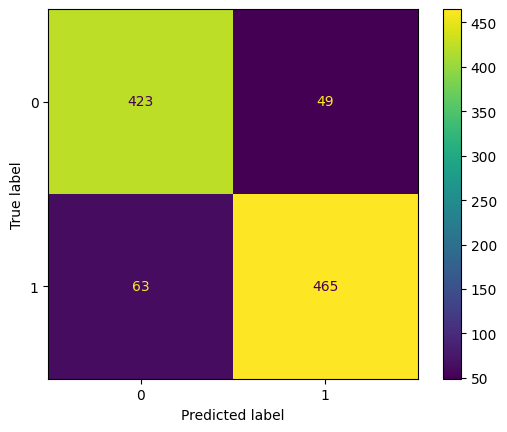

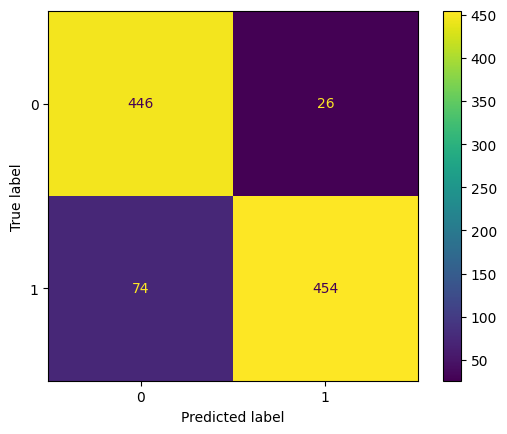

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Logistic Regression model initialization
lr_model = LogisticRegression()

# Fit model on training set
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy of LogisticRegression before AutoEncoder (%):", acc)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Check for GPU and use CPU if not available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Encode the data using AutoEncoder model on the correct device
X_train_ae = model.encoder(torch.Tensor(X_train).to(device)).cpu().detach().numpy()
X_test_ae = model.encoder(torch.Tensor(X_test).to(device)).cpu().detach().numpy()

# Logistic Regression after AutoEncoder transformation
lr_model = LogisticRegression()
lr_model.fit(X_train_ae, y_train)
y_pred = lr_model.predict(X_test_ae)

acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy of LogisticRegression after AutoEncoder (%):", acc)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
